In [ ]:
! pip uninstall -q transformers -y

In [ ]:
!pip install -q transformers==4.17.0

In [ ]:
!pip install datasets

In [ ]:
# datasets
from datasets import load_dataset
emotions = load_dataset('emotion')

In [ ]:
type(emotions)

In [ ]:
emotions

In [ ]:
train_ds = emotions['train']
valid_ds = emotions['validation']
test_ds = emotions['test']

In [ ]:
train_ds

In [ ]:
len(train_ds)

In [ ]:
train_ds[0]

In [ ]:
train_ds.column_names # Apache arrow - columnar format

In [ ]:
train_ds.features # feature names

In [ ]:
train_ds.features['label']

In [ ]:
train_ds.features['label'].names

In [ ]:
train_ds[:5]

In [ ]:
import pandas as pd
pd.DataFrame(train_ds[:5])

In [ ]:
# csv file
# emotion_local = load_dataset("csv", data_files="emotion.csv", sep = ",") # load from csv file

In [ ]:
train_ds

In [ ]:
emotions.set_format('pandas')
emotions

In [ ]:
df = emotions['train'][:] # loaded as df

In [ ]:
df.head()

In [ ]:
emotions['train'].features["label"]

In [ ]:
emotions['train'].features["label"].int2str(0)

In [ ]:
emotions['train'].features["label"].int2str(1)

In [ ]:
emotions['train'].features["label"].int2str(3)

In [ ]:
df["label_name"] = df["label"].apply(emotions['train'].features["label"].int2str)
df.head()

In [ ]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

In [ ]:
emotions.reset_format()

In [ ]:
# Tokenization - Subword Tokenization

from transformers import AutoTokenizer
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
# # alter way to import
# from transformers import DistilBertTokenizer
# tokenizer = DistilBertTokenizer.from_pretrained(model_checkpoint)

In [ ]:
text = "I love dominos pizza and masala dosa"
encoded_text = tokenizer(text)
encoded_text

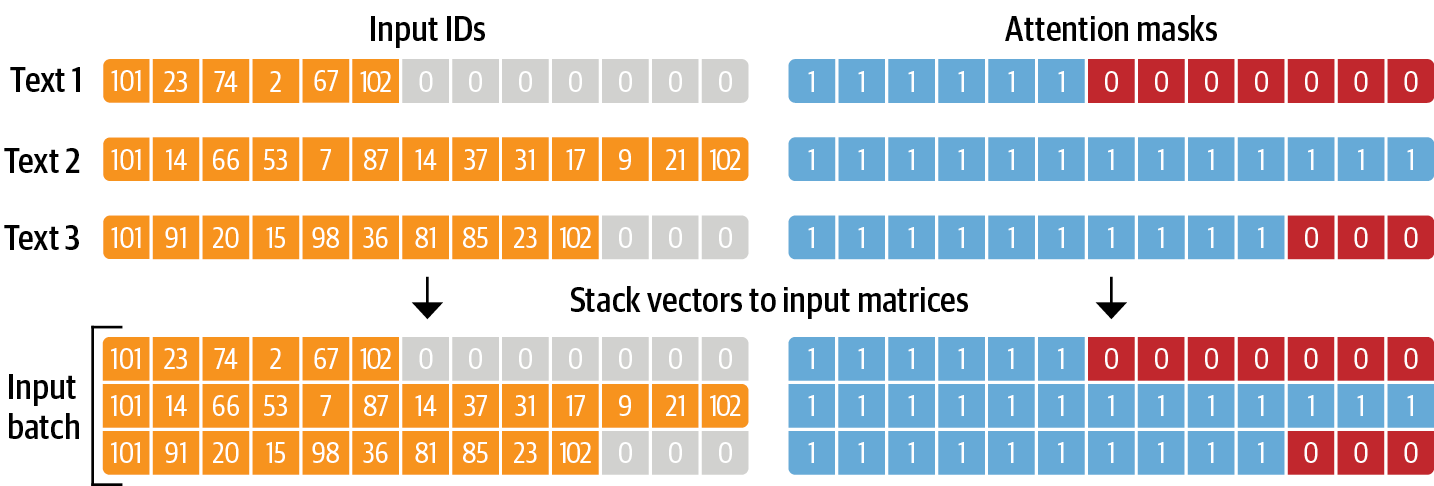

In [ ]:
tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [ ]:
tokenizer.vocab_size # vocabulory size

In [ ]:
tokenizer.model_max_length # context size

In [ ]:
tokenizer.model_input_names

In [ ]:
def tokenization(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
emotions_encoded = emotions.map(tokenization,batched=True)

In [ ]:
emotions_encoded

In [ ]:
len(emotions_encoded["train"][:]["input_ids"][0])

In [ ]:
emotions_encoded["train"][:]["input_ids"][0]

In [ ]:
emotions_encoded["train"][:]["attention_mask"][0]

In [ ]:
from transformers import TFAutoModel
model_chkpt = "distilbert-base-uncased"
model = TFAutoModel.from_pretrained(model_chkpt)

In [ ]:
inputs = tokenizer(text, return_tensors="tf")

In [ ]:
inputs

In [ ]:
model(inputs)

In [ ]:
emotions_encoded

In [ ]:
d = {"a":1, "b":2,"c":3}
d.items()

In [ ]:
tokenizer.model_input_names

In [ ]:
def tokenization(batch):
    return tokenizer(batch["text"], padding=True, truncation=True, return_tensors="tf")

In [ ]:
emotions_encoded = emotions.map(tokenization,batched=True)

In [ ]:
def extract_hidden_states(batch):
    inputs = {k:v for k,v in batch.items()
              if k in tokenizer.model_input_names}
    print(inputs)
    last_hidden_state = model(**inputs).last_hidden_state
    print(last_hidden_state.shape)
    return {"hidden_state": last_hidden_state[:,0]}

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched=True)